<a href="https://colab.research.google.com/github/paolofesta/prove/blob/master/scrittura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Scelta dell’oggetto di studio**
La scelta di utilizzare Twitter, raccogliendo tweet da analizzare, è nata da una riflessione svolta con il relatore; dal momento che questo tipo di analisi non era ancora stata affrontata nel mio percorso di studi, l’interesse verso questo tipo di ricerca era elevato, così come l’impegno richiesto. Prima ancora di decidere il target della ricerca, era indispensabile conoscere i meccanismi di raccolta dei tweet, per capire cosa si potesse ottenere. In quest’ottica è stato fondamentale il Twitter Developer Portal, tramite esso è stato creato un developer account con accesso elevato, in quanto l’accesso standard comportava limiti eccessivi. Tramite la Dashboard del Developer Portal si poteva avere accesso ai propri progetti e alle proprie app, strumenti essenziali per ottenere accesso alle API di Twitter e quindi per raccogliere i tweet. Queste informazioni e molte altre sono consultabili nella sezione Docs del portale, che si è rivelata strumento utilissimo non solo in questa fase iniziale ma per tutta la durata del progetto. Una volta compreso cosa effettivamente si poteva raccogliere, la concentrazione si è focalizzata sulla scelta dell’oggetto di studio vero e proprio. La scelta è ricaduta sull’analisi dei tweet citanti le tre maggiori sigle sindacali italiane: Cgil, Cisl e Uil. I motivi sono molteplici: Il mutamento del ruolo dei sindacati e la crisi dei tassi di sindacalizzazione è stato un fenomeno riscontrato più volte durante il percorso di studi, suscitando molto interesse; inoltre, in questo modo è stato possibile raccogliere un buon numero di tweets, circa tredicimila, condizione essenziale per poter fare un’analisi valida. L’intento era quello di svolgere una Sentiment Analysis dei tweets raccolti, ovvero identificare sentimenti ed emozioni associati ai tweets, non fermandosi ai dati generali ma andando alla ricerca di variabili in grado di cambiare questa associazione. 
### **Scelta del linguaggio di programmazione**
Le due opzioni prese in considerazione erano Python ed R, entrambi i linguaggi di programmazione sono stati appresi durante il percorso di studi e sono da considerare come validi strumenti. La scelta è ricaduta su Python per diverse ragioni: innanzitutto, la maggiore diffusione, che porta ad una maggiore quantità di documentazione e ad una più ampia community di utilizzatori, molto utile per risolvere problemi e ricevere chiarimenti; inoltre, perché permette di utilizzare Google Colab, strumento molto comodo e versatile che permette di usare Python dal proprio browser. Per concludere, Python è stato indicato come primo nella top ten dei linguaggi di programmazione più popolari da imparare nel 2020 secondo la Northeastern Univeristy. 

### **Librerie utilizzate**
NumPy è una libreria essenziale di Python, utilizzata per gestire le matrici numeriche (arrays); Pandas è invece una libreria costruita sulla base di quella precedente, che permette di gestire i dataframe, ovvero degli arrays multidimensionali in forma tabellare. Tweepy, permette di avere accesso alle API di twitter per raccogliere diverse tipologie di dati, esistono altre librerie simili, questa è però tra le più utilizzate, essendo indicata anche all’interno del Twitter Developer Portal. re e gensim sono librerie utilizzate per il topic modelling, cioè per processare il testo dei tweet prima di poter iniziare con la sentiment analisys. feel_it è una libreria tramite la quale si può utilizzare un modello che, attraverso un corpus di tweet classificati in base a quattro emozioni basiche(rabbia, paura, gioia, tristezza), permette di inferire sentimenti ed emozioni da tweet in lingua italiana. Infine, matplotlib.pyplot e seaborn, sono librerie utilizzate a fini di visualizzazione, per produrre word clouds e grafici.





In [ ]:
import numpy as np
import pandas as pd
import tweepy
import re
import gensim
import fell-it
import matplotlib.pyplot as plt
import seaborn as sns

### **Accesso alle API di Twitter**
Tramite la seguente funzione, è stato possibile connettere l'ambiente di lavoro con il Developer account, inserendo le diverse password fornite dal Developer Portal; questo aspetto è stato indispensabile per poter interagire con le API di Twitter.

In [ ]:
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth, wait_on_rate_limit=True ,wait_on_rate_limit_notify=True)
    return api
    
api = connect_to_twitter_OAuth()

### **Scraping**
Sono stati raccolti 13 365 tweets nel cui testo venivano citati i profili delle tre maggiori sigle sindacali italiane: @cgilnazionale, @CislNazionale,@UILofficial. Durante questa fase è stata essenziale la consultazione del Developer Portal di Twitter. Le limitazioni nella raccolta di tweet imposte sono infatti molto stringenti: impongono l'obbligo di poter raccogliere esclusivamente i tweet prodotti nei sette giorni precedenti alla richiesta; a meno che non si voglia raccogliere solo i tweet di uno specifico utente, in questo caso si può raccogliere un massimo di 3000 tweets. Le limitazioni non si limitano solo alle sopracitate, esistono anche dei limiti riguardo al numero di tweet raccoglibili in un dato periodo di tempo, per questo è stato necessario utilizzare una funzione in grado di gestirle. La prima funzione riportata di seguito è stata utilizzata per la gestione delle limitazioni. 






In [ ]:
def limit_handled(cursor):
  while True:
    try:
      yield cursor.next()
    except StopIteration:
      return
    except tweepy.RateLimitError:
        time.sleep(15*60)

La seguente per la raccolta degli attributi dei tweet.


In [ ]:

def extract_tweet_attributes(tweet_object):
    tweet_list =[]
    for tweet in tweet_object:
        tweet_id = tweet.id 
        language= tweet.lang 
        name= tweet.user.name     
        location= tweet.user.location
        follower_count= tweet.user.followers_count
        verified= tweet.user.verified
        text = tweet.full_text 
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at 
        source = tweet.source 
       
       
        tweet_list.append({'tweet_id':tweet_id,
                           'language':language,
                          'text':text,
                          'name':name,
                          'location':location,
                          'follower_count':follower_count,
                          'verified': verified,
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source,})

     
    df1 = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'language',
                                           'name',
                                           'follower_count',
                                           'verified',
                                           'location',    
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source'])
    return df1


df1 = extract_tweet_attributes(pp1)


Il numero di tweet si è poi ridotto da 13 365 a 12 560, eliminando i tweet incompatibili con la ricerca; la raccolta è avvenuta in due momenti: in data 12/5/2022 sono stati raccolti i tweet prodotti dal 6/5 al 12/5, In data 23/7/2022 sono stati raccolti i tweet prodotti dal 17/7 al 23/7, per via dei suddetti limiti. Per ogni tweet sono stati raccolti i seguenti attributi: 
*   L’ID del tweet
*   La lingua in cui è stato scritto
*   Il testo del tweet
*   Il nome dell’utente che l’ha prodotto
*   La location( qualora indicata)
*   Il numero di follower dell’utente 
*   Lo status di verificato o meno dell’utente 
*   Il numero di favourites del tweet
*   Il numero di retweet
*   L’orario in cui è stato creato 
*   La fonte\
Arrivando ad ottenere il dataframe riportato di seguito

In [ ]:
#@title 
data=pd.read_csv(r'/content/data (1)').drop("Unnamed: 0",axis=1)
data.drop("sigla",axis=1)

,tweet_id,text,language,name,follower_count,verified,location,favorite_count,retweet_count,created_at,source
0,1524830657712640010,RT @kastatrof: Imaginez.. à qq heures de route...,fr,Gandalf,125,False,NaN,0,7,2022-05-12 19:15:33,Twitter for Android
1,1524824670125625345,@cgilnazionale Sembra una supercazzola... prem...,it,Patsy 🇮🇹,36,False,NaN,1,0,2022-05-12 18:51:45,Twitter for Android
2,1524809559851814912,RT @kastatrof: Imaginez.. à qq heures de route...,fr,ivy,498,False,NaN,0,7,2022-05-12 17:51:43,Twitter for Android
3,1524804096439492612,🟥SOLO LA PACE\n@cgilnazionale partecipa all'ac...,it,FLC CGIL Roma Lazio,1238,False,"Roma, Via Buonarroti 12",0,0,2022-05-12 17:30:00,Twitter Web App
4,1524802721789972485,@fpcgil_internaz @fbunational @FpCgilVVF @EPSU...,und,Sven De Guise,281,False,Gelrode,1,0,2022-05-12 17:24:32,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...
13360,1549297798784458760,@paolo_r_2012 @INL_gov @AndreaOrlandosp @MinLa...,es,Sandra Zampa,12191,False,NaN,1,1,2022-07-19 07:39:14,Twitter for iPhone
13361,1549296792193441792,RT @UILofficial: La crisi di Governo è un grav...,it,Uiltec Calabria,97,False,"Lamezia Terme, Calabria",0,16,2022-07-19 07:35:14,Twitter for iPhone
13362,1549268625386766344,"RT @emalombardini: #crisidigoverno , appello a...",it,Loris Cavalletti,914,False,NaN,0,3,2022-07-19 05:43:18,Twitter for iPhone
13363,1549261964307734533,RT @UILofficial: La crisi di Governo è un grav...,it,Felice Alfonsi,657,False,NaN,0,16,2022-07-19 05:16:50,Twitter for iPhone


### **Analisi preliminare**
Si è proceduto a creare una variabile, denominata “sigla”, che indicasse a quale sindacato faceva riferimento il tweet; tramite un grafico a barre si è osservato che i tweet si dividono come segue: una percentuale del 66-68% dei tweet fa riferimento al sindacato Cisl, segue Cgil con una percentuale poco sotto al 30%, Uil è ultimo con una percentuale vicina al 5%. Questi dati sono in linea con l’attività dei profili dei sindacati su Twitter; infatti, @CislNazionale è in testa con più di 100.000 tweets prodotti, @cgilnazionale segue a quota 50.000 e ,@UILofficial ne ha prodotti circa 12.000. Osservando invece le dimensioni dei profili, il primo è @cgilnazionale con più di 80.000 followers, seguito da @CislNazionale a 30.600 e @UILofficial a 12.500.                                                                                                                   

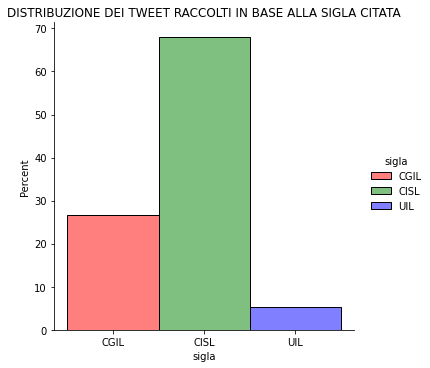

In [ ]:
#@title 
sns.displot(data,x="sigla",stat="percent",hue="sigla",palette=['r','g','b'])
plt.title('DISTRIBUZIONE DEI TWEET RACCOLTI IN BASE ALLA SIGLA CITATA')
print()


 Successivamente, attraverso apposite funzioni, è stata creata una variabile denominata “cleaned text”, contenete il testo dei tweet pre-processato. Sono stati rimossi: la punteggiatura, i link, gli hashtag, i doppi spazi e le maiuscole. Qui viene riportato un esempio della colonna "cleaned text" a confronto con il testo non ancora processato.  

In [ ]:
#@title 
df3.iloc[[11,12]]

,tweet,cleaned
11,RT @cgilnazionale: Al via il @FestivalSabir. D...,al via il da oggi fino al maggio a matera il...
12,A Berlino si incontrano oggi i Sindacati L7 co...,a berlino si incontrano oggi i sindacati l con...


La pulizia del testo dei tweet è servita per l’utilizzo di "FEEL-IT: Emotion and Sentiment Classification for the Italian Language", modello pubblicato dall’Association for Computational Linguistics nel 2021. Tramite questo modello è stato possibile produrre due variabili: la variabile “sentiment”, indicante il sentimento espresso dal tweet, diviso in “positive” o “negative”; la variabile “emotion”, indicante l’emozione espressa dal tweet, divisa in “anger”,”fear”,”sadness”,”joy”. Di seguito è riportata la cella tramite cui si importanto da feel-it i due classificatori: Uno per le emozioni e uno per i sentimenti; oltre all'esempio di un tweet con le variabili sopracitate.


In [ ]:
from feel_it import EmotionClassifier
emotion_classifier = EmotionClassifier()
from feel_it import SentimentClassifier
sentiment_classifier = SentimentClassifier()

In [ ]:
#@title 
datasent=pd.read_csv(r'/content/datasent').drop(["follower_count","favorite_count","retweet_count","sigla","tweet_id","Unnamed: 0","language","created_at","source","location","verified"],axis=1)
datasent.loc[datasent["name"]=="Patsy 🇮🇹"].drop("name",axis=1)


,sentiment,emotion,cleaned_text
0,negative,anger,sembra una supercazzola prematurata con scapp...


Una volta ottenuti questi dati, è stata svolta un’analisi generale. Tramite un grafico a barre si è osservato che la distribuzione dei sentimenti è composta come segue: circa il 70% dei tweet è associato al valore “negative”, mentre solo il 30% ha valore “positive”. Lo stesso quadro si palesa anche osservando la distribuzione delle emozioni: considerando “joy” come emozione positiva e aggregando le altre tre come negative si ritrova una percentuale molto simile a quella del precedente grafico. Si può quindi affermare che quando si producono tweet citando un sindacato, la  tendenza sia quella di produrre tweet negativi. I motivi possono essere molteplici: insoddisfazione riguardo all’operato del sindacato, insoddisfazione legata a fattori esterni al sindacato o che lo riguardano indirettamente, oppure, questa tendenza potrebbe derivare dal tono con cui ci si esprime su Twitter, indipendentemente dall'argomento. 


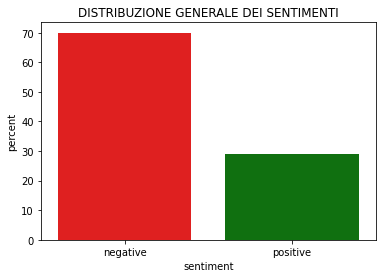

In [ ]:
#@title
sns.barplot(data=df,x='sentiment',y='percent',palette=['r','g']).set_title('DISTRIBUZIONE GENERALE DEI SENTIMENTI') 
print()

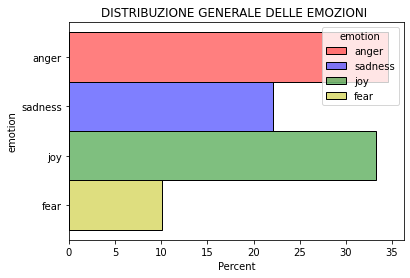

In [ ]:
#@title 
sns.histplot(datasent,y='emotion',stat='percent',hue='emotion',palette=['r','b','g','y']).set_title('DISTRIBUZIONE GENERALE DELLE EMOZIONI ') 
print()

### **Prima variabile: Sigla sindacale citata**                                                                         
Dopo aver svolto l’analisi preliminare, per comprendere più a fondo il fenomeno è stato necessario focalizzarsi su nuove variabili. In primis si è osservato il cambiamento dei sentimenti espressi nei tweet in relazione alla sigla sindacale citata: i tweet citanti la sigla Cisl, hanno una percentuale di “sentiment” negativi pari a circa il 65% e positivi pari al 35%, sono i tweet in cui la differenza tra sentimenti positivi e negativi è minore. I tweet citanti Cgil sono quelli in cui si riscontrano le percentuali più estreme: I tweet negativi superano l’80%; I tweet citanti Uil invece, si collocano approssimativamente a metà tra gli altri due valori.


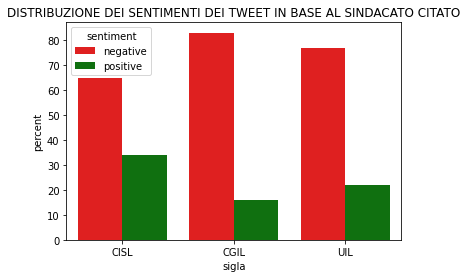

In [ ]:
#@title 
sns.barplot(data=df1,x='sigla',y='percent',hue='sentiment',palette=['r','g']).set_title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE AL SINDACATO CITATO') 
print()

### **Seconda variabile: Relazione con il sindacato**                                                                                                                                                                                                                           
Un’altra variabile importante è legata alla relazione che l’utente che produce il tweet ha con il sindacato. Analizzando i nomi degli utenti, si nota la presenza di utenti che hanno stretti legami con i sindacati; infatti, pur essendo stati rimossi nella fase iniziale i tweet prodotti dai profili delle tre sigle, sono rimasti i tweet delle sezioni locali dei sindacati, che naturalmente influenzano i risultati. Si è quindi proceduto a pre-processare i nomi degli utenti, rendendo minuscoli tutti i caratteri; in modo da poter filtrare i nomi senza errori e creare la variabile “articolazione”, che può produrre come risultato “SI” o “NO”, in base alla relazione dell’utente con il sindacato. Di seguito viene riportato un'esempio: 

In [ ]:
#@title 
d=data.drop(["follower_count","favorite_count","retweet_count","sigla","tweet_id","Unnamed: 0","language","created_at","source","location","verified"],axis=1)
d.iloc[[7,9999]]


,sentiment,emotion,cleaned_text,low_name,articolazione
36,negative,sadness,si è chiuso l avviso pubblico del piano di ri...,cgil modena,SI
9516,negative,anger,“quanto sta accadendo in italia è incommentab...,salvatore montalbano,NO


La suddivisione degli utenti ha portato a concludere che: il 20% degli utenti raccolti è un’articolazione dei sindacati mentre il restante 80% è composto da utenti autonomi. 


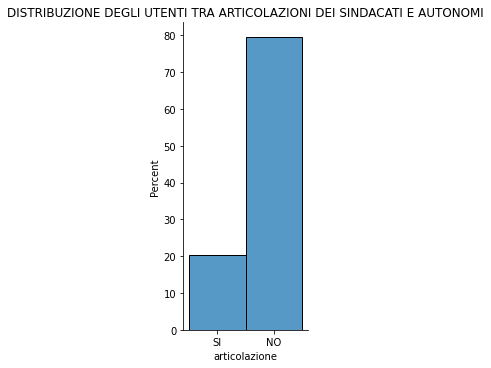

In [ ]:
#@title 
sns.displot(data,x='articolazione',kind='hist',aspect=.5,stat="percent")
plt.title("DISTRIBUZIONE DEGLI UTENTI TRA ARTICOLAZIONI DEI SINDACATI E AUTONOMI")
plt.ylim()
print()

Consultando i risultati della distribuzione dei sentimenti dei tweet in relazione alla nuova variabile emerge che i tweet degli utenti considerati come articolazioni hanno percentuali di tweet negativi pari al 65% e positivi pari al 35%, mentre i tweet degli utenti autonomi hanno percentuali diverse , anche se non eccessivamente, pari a poco più del 70% per quelli negativi e poco meno del 30% per quelli positivi.

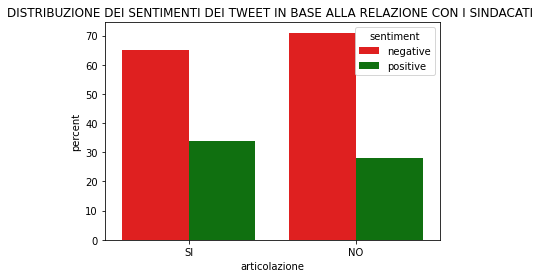

In [ ]:
#@title 
sns.barplot(data=df,x='articolazione',y='percent',hue='sentiment',palette=['r','g']).set_title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE ALLA RELAZIONE CON I SINDACATI ') 
print()

 Una differenza rilevante si ritrova invece nella distribuzione delle emozioni: Per i tweet prodotti dalle articolazioni dei sindacati la percentuale di rabbia espressa è pari solo al 25%, inferiore rispetto a tristezza(28%) e gioia( 38-39%); per quanto riguarda invece i tweet degli utenti autonomi, la rabbia è l’emozione maggioritaria, con una percentuale di poco al di sotto del 40%.

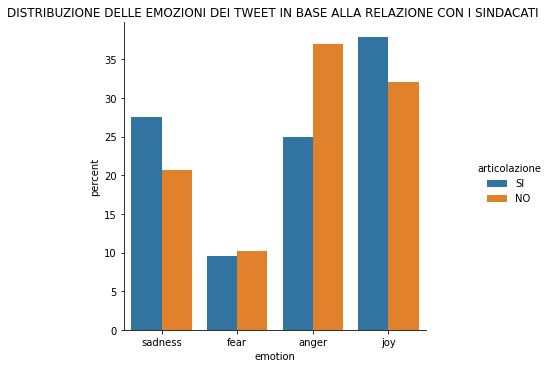

In [ ]:
#@title 
sns.catplot(data=df1,x='emotion',y='percent',hue='articolazione',kind='bar', dodge=True)
plt.title('DISTRIBUZIONE DELLE EMOZIONI DEI TWEET IN BASE ALLA RELAZIONE CON I SINDACATI ') 
print()



### **Terza variabile: Numero di followers**
Successivamente si è ricercata una correlazione tra le opinioni espresse dai tweet e il numero di followers degli utenti. È stata prodotta la variabile “followers” che, a differenza della già esistente “followers count”, non indica semplicemente il numero di followers di ogni utente ma divide gli utenti in quartili. Di seguito sono riportati il procedimento ed un esempio dell'output. 

In [ ]:
quartili=pd.DataFrame(datasent['follower_count'].quantile(np.linspace(0.0,1.0,num=5)))
quartili

,follower_count
0.00,0.0
0.25,168.0
0.50,497.0
0.75,1483.0
1.00,3413809.0


In [ ]:
d1=data.loc[data['follower_count']<=168]
d1['followers']='(Q1) 0-168'
d2=data.loc[(data['follower_count']>168)&(data['follower_count']<=497)]
d2['followers']='(Q2) 169-497'
d3=data.loc[(data['follower_count']>497)&(data['follower_count']<=1483)]
d3['followers']='(Q3) 498-1483'
d4=data.loc[(data['follower_count']>1483)&(data['follower_count']<=3413809)]
d4['followers']='(Q4) 1484-3413809'
df=pd.concat([d1,d2,d3,d4])
df




In [ ]:
#@title 
d=df.drop(["month","favorite_count","retweet_count","sigla","tweet_id","Unnamed: 0","language","created_at","source","location","verified"],axis=1)
d.iloc[[999]]

,name,follower_count,sentiment,emotion,cleaned_text,followers
4668,Aradia,53,negative,sadness,c è già il durissimo comunicato che ci si asp...,(Q1) 0-168


Si è potuto così osservare che i quartili due , tre e quattro hanno percentuali pressoché uguali, mentre il primo quartile, quello degli utenti che hanno da 0 a 138 followers, ha valori maggiori di tweet negativi e minori di tweet positivi. La peculiarità del primo quartile si riscontra anche osservando le emozioni dei tweet, la rabbia è espressa in maniera significativamente maggiore nei tweet degli utenti del primo quartile, mentre la gioia si attesta su percentuali più basse. 

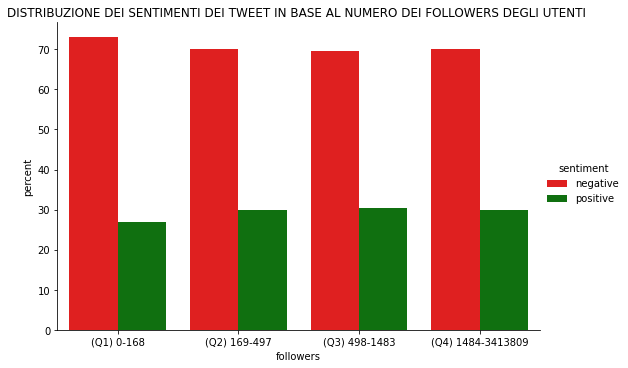

In [ ]:
#@title 
sns.catplot(data=df1,x='followers',y='percent',hue='sentiment',palette=['r','g'],kind="bar",aspect=1.5)
plt.title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE AL NUMERO DEI FOLLOWERS DEGLI UTENTI ') 

print()

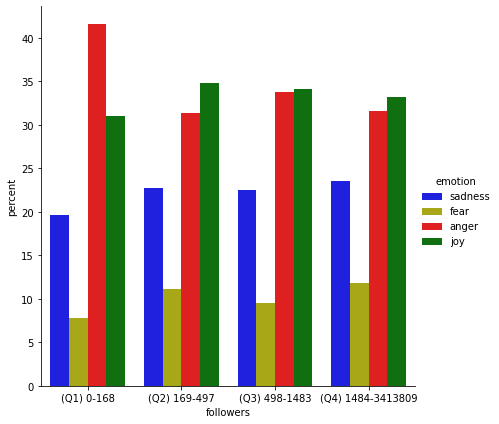

In [ ]:
#@title
sns.catplot(data=df1,x='followers',y='percent',hue='emotion',kind='bar', dodge=True,palette=["b","y","r","g"],height=6)
plt.title('') 
print()

Alla luce di questi risultati, si è considerato opportuno affinare ulteriormente l’analisi, sostituendo la divisione in quartili con una in decili. Si è potuto così comprendere che le variazioni del primo quartile non dipendevano da tutti gli utenti che ne facevano parte, ma solo dal primo decile, quello riguardante gli utenti con un numero di followers da 0 a 37. 

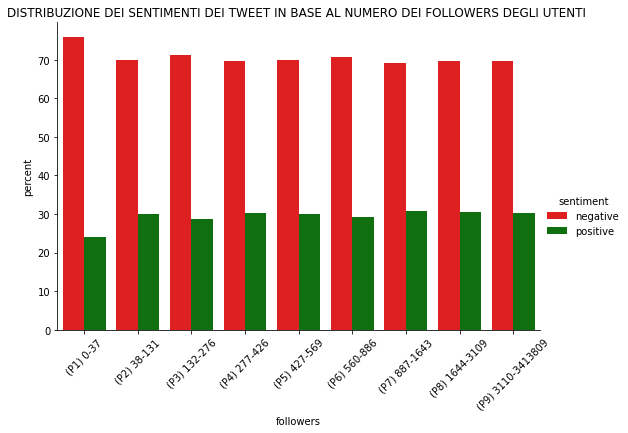

In [ ]:
#@title 
sns.catplot(data=df1,x='followers',y='percent',hue='sentiment',palette=['r','g'],kind="bar",aspect=1.5)
plt.title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE AL NUMERO DEI FOLLOWERS DEGLI UTENTI ') 
plt.xticks(rotation=45)
print()

Osservando la Word Cloud di questi utenti e mettendole in relazione con la Word Cloud di tutti gli utenti con un numero maggiore di follower, si osserva una differenza nei contenuti e nei toni di espressione.


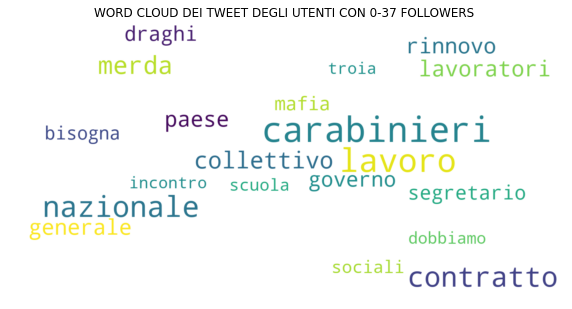

In [ ]:
#@title 
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=100,max_words=20,collocations=False, background_color='white').generate(words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WORD CLOUD DEI TWEET DEGLI UTENTI CON 0-37 FOLLOWERS ')
print()   

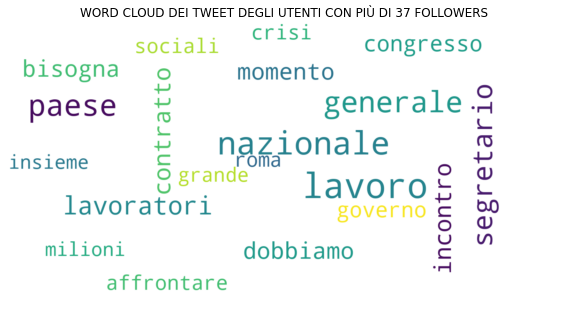

In [ ]:
#@title 
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=100,max_words=20,collocations=False, background_color='white').generate(words1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WORD CLOUD DEI TWEET DEGLI UTENTI CON PIÙ DI 37 FOLLOWERS ')
print() 

### **Quarta variabile: Periodo** 
 All’interno delle Word Cloud si ritrovano anche dei vocaboli che fanno intuire la presenza di un fattore esogeno, non dipendente dai sindacati, che può influenzare i risultati in termini di sentimenti ed emozioni espressi nei tweet. È il caso dei vocaboli “governo”, ”draghi”, ”crisi”.  Il fenomeno in questione è quello della crisi di governo, verificatasi nel mese di luglio. Si è quindi proceduto ad isolare questo fenomeno, creando una variabile che dividesse i tweet in base al mese di raccolta. 

In [ ]:
d1=datasent.loc[datasent['Unnamed: 0'].isna()]
d1['month']="june"
d2=datasent.loc[datasent['Unnamed: 0'].notna()]
d2['month']="May"
datamonth=pd.concat([d1,d2])

In [ ]:
#@title 
datamonth=pd.read_csv("/content/datamonth")
d=datamonth.drop(["follower_count","favorite_count","retweet_count","sigla","tweet_id","Unnamed: 0","language","created_at","source","location","verified"],axis=1)
d.iloc[[1]]

,name,sentiment,emotion,cleaned_text,month
1,Andrea Tafaria,negative,anger,“nel rispetto dell’autonomia delle forze poli...,june


Attraverso dei grafici a barre viene evidenziata la variazione dei sentimenti e delle emozioni espresse nei tweet al variare del periodo di raccolta, denotando un generale peggioramento: oltre ad un aumento percentuale dei tweet manifestanti sentimenti negativi e conseguentemente una riduzione di quelli positivi, risalta l’aumento dei tweet esprimenti tristezza. 

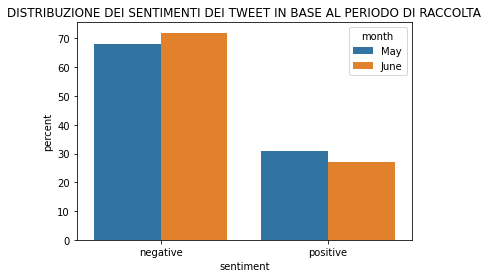

In [ ]:
#@title 
sns.barplot(data=df,x='sentiment',y='percent',hue='month').set_title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE AL PERIODO DI RACCOLTA') 
print()

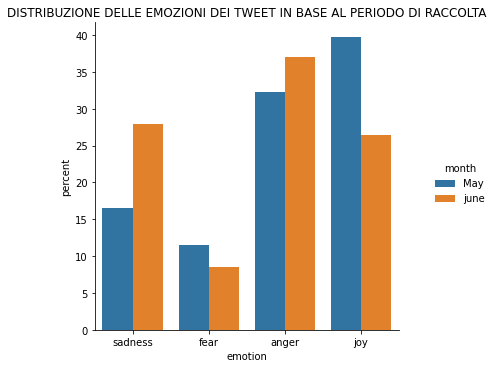

In [ ]:
#@title 
sns.catplot(data=df1,x='emotion',y='percent',hue='month',kind='bar', dodge=True)
plt.title('DISTRIBUZIONE DELLE EMOZIONI DEI TWEET IN BASE AL PERIODO DI RACCOLTA') 
print()



È stato implementato poi il grafico sopracitato, indicante la variazione dei sentimenti espressi al variare del numero di followers diviso in quartili, aggiungendo la divisione in base al mese tramite il faceting. Si è potuto così osservare come la differenza tra il primo quartile e gli altri esistesse anche prima dell’avvento della crisi di governo. 

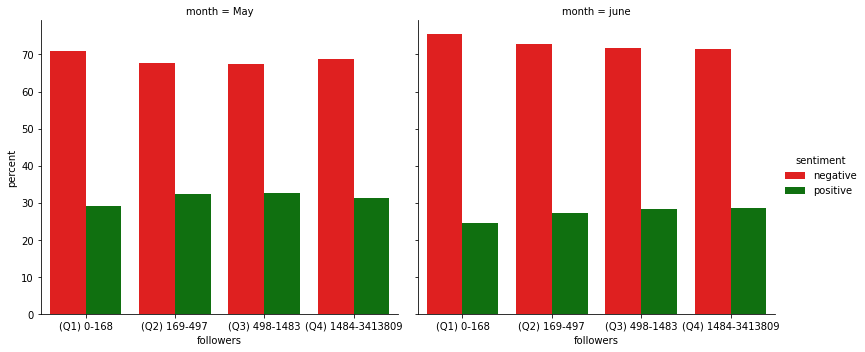

In [ ]:
#@title 
sns.catplot(data=df,x='followers',y='percent',hue='sentiment',palette=['r','g'],kind="bar",col="month",aspect=1.1,col_wrap=2)
print()

Si è voluto poi quantificare l’impatto della crisi sulla mutazione dei sentimenti dei tweet, suddividendo i tweet contenenti il vocabolo “crisi” in base al mese in cui erano stati prodotti: soltanto poco più del 25% di questi tweet sono stati prodotti a maggio, mentre il restante 75% è stato prodotto a giugno. Sommando questa informazione al fatto che è risultato che il 100% di questi tweet siano associati a sentimenti negativi, si può affermare che la variazione osservata trovi nella crisi di governo la sua spiegazione.


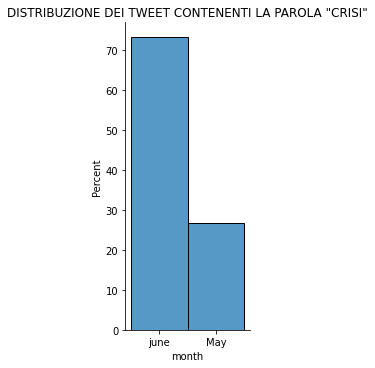

In [ ]:
#@title 
dfcrisi=datamonth.loc[datamonth['cleaned_text'].str.contains('crisi')]
sns.displot(dfcrisi,x="month",stat="percent",aspect=.5)
plt.title('DISTRIBUZIONE DEI TWEET CONTENENTI LA PAROLA "CRISI"')
print()

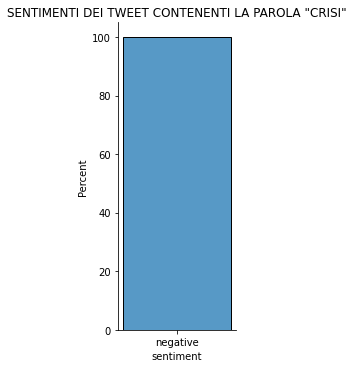

In [ ]:
#@title 
sns.displot(dfcrisi,x="sentiment",stat="percent",aspect=.5)
plt.title('SENTIMENTI DEI TWEET CONTENENTI LA PAROLA "CRISI"')
print()

### **Quinta variabile: Numero di retweets**
Dopo aver compreso questo aspetto, si è potuto riprendere ad analizzare le metriche, focalizzandosi sui retweet. Si è proceduto a suddividere i tweet in quartili, in questo caso non in base al numero di followers degli utenti che li scrivevano ma in base al numero di retweet ricevuti, arrivando alle seguenti conclusioni: gli estremi, ovvero il primo quartile (0-5 retweets) e il quarto(79-298), avevano valori praticamente uguali e lo stesso si poteva affermare anche per il secondo e terzo quartile (6-35 e 36-78 retweet). La prima coppia di quartili aveva valori vicini all’80% di tweet manifestanti sentimenti negativi e al 20%  sentimenti positivi, mentre la seconda coppia aveva valori vicini al 60% per i tweet negativi e 40% per quelli positivi. 

In [ ]:
#@title 

d=df.drop(["month","favorite_count","follower_count","sigla","tweet_id","Unnamed: 0","language","created_at","source","location","verified"],axis=1)
d.iloc[[77]]

,name,retweet_count,sentiment,emotion,cleaned_text,retweet
528,Patrizia Grasso,4,negative,fear,lavoro sette infortuni al giorno è allarme ba...,(Q1) 0-5


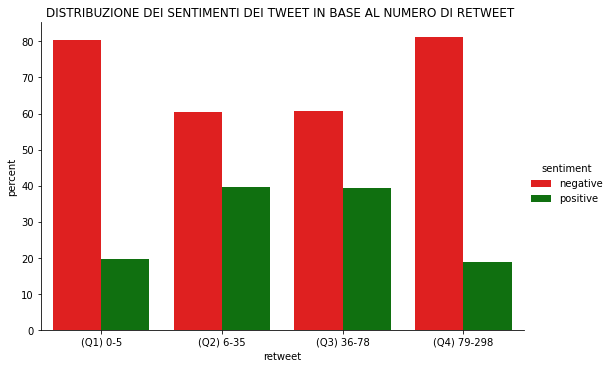

In [ ]:
#@title 
sns.catplot(data=df1,x='retweet',y='percent',hue='sentiment',palette=['r','g'],kind="bar",aspect=1.5)
plt.title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE AL NUMERO DI RETWEET ') 

print()

Osservando il medesimo grafico, stavolta indicante le emozioni, si comprende che il primo e il quarto quartile, che sembravano molto simili, hanno in realtà delle differenze: il primo ha altissime percentuali di tweet manifestanti rabbia, vicine al 60%, mentre quelli manifestanti gioia non arrivano al 20%; il quarto ha percentuali simili tra loro per rabbia e gioia, 30% e 28%,  i tweet manifestanti tristezza invece si attestano per poco al di sotto del 40%, mentre i corrispettivi del primo quartile non arrivano al 15%. Si può riassumere quindi che pur essendo entrambi spostati verso sentimenti negativi, la composizione dei due quartili sia sostanzialmente diversa.


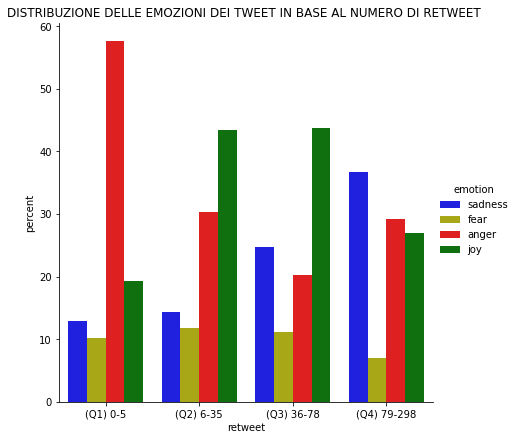

In [ ]:
#@title 
sns.catplot(data=df1,x='retweet',y='percent',hue='emotion',kind='bar', dodge=True,palette=["b","y","r","g"],height=6)
plt.title('DISTRIBUZIONE DELLE EMOZIONI DEI TWEET IN BASE AL NUMERO DI RETWEET ') 
print()

### **Risultati comparati: Numero di followers e di retweets**
Per mettere in relazione le due variabili “followers” e “retweet”, è stato prodotto un violin plot; gli spunti che fornisce sono molteplici: Dal grafico si apprende innanzitutto un’informazione controintuitiva, non sono gli utenti con più followers a ricevere più retweet. Tra i vari utenti, quelli appartenenti all’ultimo quartile sono quelli con il picco di retweet più basso, mentre il più alto è raggiunto dagli utenti del primo quartile. Si può osservare inoltre una tendenza generale, non influenzata dal sentimento espresso dal tweet e nemmeno dal numero di follower: la maggior parte dei tweet ha un numero estremamente basso di retweet, vicino allo zero; questo sta ad indicare il fatto che raramente questi tweet diventano virali, limitando il raggio d’azione ad una nicchia di utenti. Un’altra tendenza che si nota è quella per cui i tweet associati a sentimenti positivi si distribuiscono maggiormente rispetto a quelli negativi nell’intervallo di retweet che va dai 20-25 retweet ai 100-120, mentre i picchi di retweet sono raggiunti esclusivamente da tweet associati a sentimenti negativi, evidenziando la maggiore facilità che questi hanno nel essere condivisi.


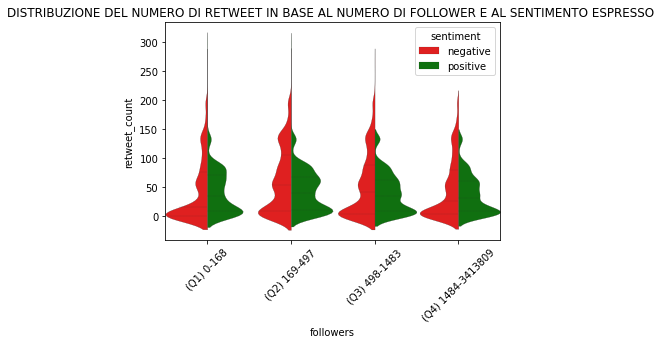

In [ ]:
#@title 
sns.violinplot(data=datacomb,x="followers",y="retweet_count",hue="sentiment",split='True',palette=["r","g"],inner="quartile", width=1,linewidth=0.2,order=["(Q1) 0-168","(Q2) 169-497","(Q3) 498-1483","(Q4) 1484-3413809"])
plt.title('DISTRIBUZIONE DEL NUMERO DI RETWEET IN BASE AL NUMERO DI FOLLOWER E AL SENTIMENTO ESPRESSO ')
plt.xticks(rotation=45)
print()
#sistemare ordine asse x

### **Sesta variabile: Numero di tweet**
Un ulteriore aspetto interessante riguarda l’eventuale cambiamento derivante dall’attività degli utenti, ovvero dal numero di loro tweet presenti tra quelli raccolti. Si è proceduto raggruppando gli utenti in base al  numero di tweet prodotti; arrivando a produrre due datasets: Uno indicante il numero di tweet prodotti da ciascun utente e i relativi sentimenti, l'altro con la medesima funzione ma indicante le emozioni. di seguito sono riportati due esempi.

In [ ]:
#@title 
datanum.iloc[[589]]

,name,numtweet,negative,positive
589,Valerio Doriano,4,3.0,1.0


In [ ]:
#@title
datanum2.iloc[[1000]]

,name,numtweet,anger,fear,joy,sadness
1000,Pietro Seritti,7,0.0,2.0,4.0,1.0


Si è poi scoperto che la metà degli utenti aveva prodotto soltanto un tweet, viene qui riportata la distribuzione percentuale del numero di tweet per utente.

In [ ]:
#@title 
decili=pd.DataFrame(datanum['numtweet'].quantile(np.linspace(0.0,1.0,num=9)))
decili
# circa la metà degli utenti ha fatto un solo tweet, ma non confonderti perchè la maggior parte dei tweet sono fattida utenti che ne hanno fatti più di uno
#questo df è importante 

,numtweet
0.000,1.0
0.125,1.0
0.250,1.0
0.375,1.0
0.500,1.0
0.625,2.0
0.750,4.0
0.875,7.0
1.000,135.0


Si è così deciso di suddividere gli utenti in due classi: una composta da chi aveva prodotto un solo tweet, l’altra dagli utenti più attivi. Dai grafici prodotti sì è giunti alle seguenti conclusioni: i tweet della seconda classe hanno percentuali molto simili a quelle viste nell’analisi preliminare, quelli della prima classe invece, hanno percentuali maggiori di sentimenti ed emozioni negativi. 

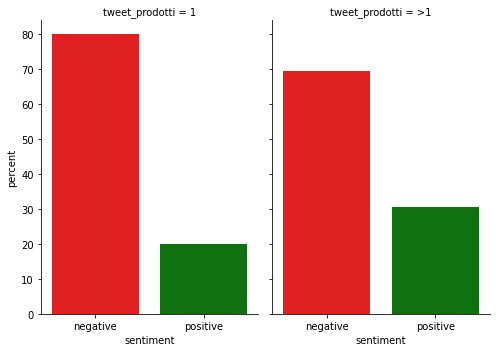

In [ ]:
#@title 
sns.catplot(data=df1,x='sentiment',y='percent',kind='bar', dodge=True, palette=["r","g"],col="tweet_prodotti",aspect=.7)
 
print()



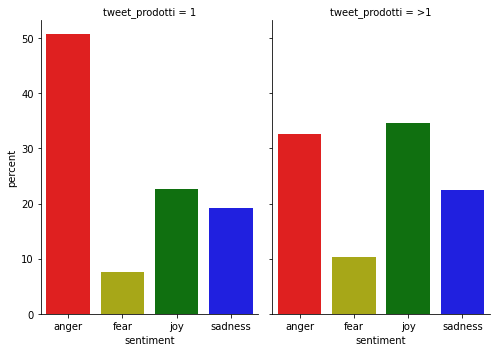

In [ ]:
#@title
sns.catplot(data=df1,x='sentiment',y='percent',kind='bar', dodge=True, palette=["r","y","g","b"],col="tweet_prodotti",aspect=.7)
 
print()



Dati i risultati ottenuti, si è deciso di indagare la composizione degli utenti che avevano twittato un'unica volta. È stato prodotto un dataset indicante il numero di tweet prodotti dall'utente e il suo numero di followers, di seguito viene riportato un esempio.

In [ ]:
#@title 
datanumcomb.iloc[[5]]

,name,followers,numtweet,negative,positive
5,💛❤️🐺SMarco🐺💛❤️,(P2) 38-131,1,1.0,0.0


Attraverso il seguente grafico si è poi potuto osservare la distribuzione degli utenti produttori di un unico tweet.Il suddetto grafico dimostra l'esistenza di una classe di utenti caratterizzati da pochi followers e bassa partecipazione attiva, che, come è stato precedentemente evidenziato, tendono ad esprimersi con toni più negativi ed aggressivi rispetto alla media.

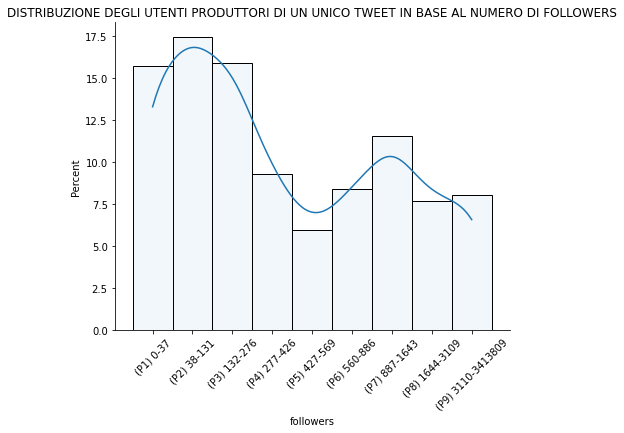

In [ ]:
#@title 
sns.displot(datauno4,x="followers",stat="percent",aspect=1.3,kde=True,alpha=.06)
plt.xticks(rotation=45)
plt.title("DISTRIBUZIONE DEGLI UTENTI PRODUTTORI DI UN UNICO TWEET IN BASE AL NUMERO DI FOLLOWERS")
print()